In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os 
import seaborn as sns

In [21]:
 
def right(value, count):
    # To get right part of string, use negative first index in slice.
    return value[-count:]
def left(value, count):
    # To get left part of string, use negative first index in slice.
    return value[:count]

In [22]:
## directory to read
source='C:/Viren/Data/IU-DataScience/Opiod-Epidemic-Project/data'
death_data=pd.DataFrame()
byType=pd.DataFrame()
byRace=pd.DataFrame()
byGender=pd.DataFrame()
byAge=pd.DataFrame()

Opiod_combined=pd.DataFrame()

listOfFiles = os.listdir(source)
for l in listOfFiles:
    if right(l,3)=='csv' and left(l,3)=='Opi':
        
        if left(l,15)=='Opiod_Dealth_20':   ## read death file
            f1=pd.read_csv(source+"/"+l, header=0, names=['state','opdDeath','AllOverdoseDeath','OpdDeath%'])
            year=l.split('_')
            f1['year']=year[-1].replace('.csv','') ## pick the year
            death_data=pd.concat([death_data,f1])      ## append the dataset
            del f1
        
        if left(l,20)=='Opiod_Dealth_By_Type':   ## read death file
            f2=pd.read_csv(source+"/"+l, header=0, names=["state1","Oxy&Hydocodone","fenty&Tramadol","Methadone","Heroin"])
            year=l.split('_')
            f2['year1']=year[-1].replace('.csv','')
            byType=pd.concat([byType,f2])
            del f2
        if left(l,20)=='Opiod_Dealth_By_Race':   ## read death file
            f3=pd.read_csv(source+"/"+l, header=0, names=['states2',"White","Black","Hispanic","Race_Total"])
            year=l.split('_')
            f3['year2']=year[-1].replace('.csv','')
            byRace=pd.concat([byRace,f3])
            del f3
        if left(l,22)=='Opiod_Dealth_By_Gender':   ## read death file
            f4=pd.read_csv(source+"/"+l, header=0,  names=['states3',"Male","Female","GenderTotal"])
            year=l.split('_')
            f4['year3']=year[-1].replace('.csv','')
            byGender=pd.concat([byGender,f4])
            del f4
        if left(l,24)=='Opiod_Dealth_By_AgeGroup':   ## read death file
            f5=pd.read_csv(source+"/"+l, header=0,  names=['states4',"0-24","25-34","35-44","45-54","55+","AgeTotal"])
            year=l.split('_')
            f5['year4']=year[-1].replace('.csv','')
            byAge=pd.concat([byAge,f5])
            del f5
           


In [23]:
Opiod_combined=pd.merge(death_data, byType, how='inner', left_on=['state','year'], right_on=['state1','year1'])

In [24]:
Opiod_combined=pd.merge(Opiod_combined, byRace, how='inner', left_on=['state','year'], right_on=['states2', 'year2'] )

In [25]:
Opiod_combined=pd.merge(Opiod_combined, byGender, how='inner', left_on=['state', 'year'], right_on=['states3','year3'])

In [26]:
Opiod_combined=pd.merge(Opiod_combined, byAge, how='inner', left_on=['state','year'], right_on=['states4','year4'])

In [27]:
Opiod_combined.columns

Index(['state', 'opdDeath', 'AllOverdoseDeath', 'OpdDeath%', 'year', 'state1',
       'Oxy&Hydocodone', 'fenty&Tramadol', 'Methadone', 'Heroin', 'year1',
       'states2', 'White', 'Black', 'Hispanic', 'Race_Total', 'year2',
       'states3', 'Male', 'Female', 'GenderTotal', 'year3', 'states4', '0-24',
       '25-34', '35-44', '45-54', '55+', 'AgeTotal', 'year4'],
      dtype='object')

In [28]:
Opiod_combined=Opiod_combined.replace('NSD', 0, regex=True)
Opiod_combined=Opiod_combined.drop(columns=['state1','states2','states3','states4'])


In [29]:
Opiod_combined= Opiod_combined.drop(columns=['year1','year2','year3','year4'])

In [30]:
Opiod_combined=Opiod_combined.loc[Opiod_combined['state']!='United States']

In [31]:
Opiod_combined.Race_Total= pd.to_numeric(Opiod_combined.White) +pd.to_numeric(Opiod_combined.Black) +pd.to_numeric(Opiod_combined.Hispanic)

In [32]:
Opiod_combined.GenderTotal=pd.to_numeric(Opiod_combined.Male) + pd.to_numeric(Opiod_combined.Female)

In [33]:
Opiod_combined.GenderTotal=pd.to_numeric(Opiod_combined['0-24'])+ pd.to_numeric(Opiod_combined['25-34'])+pd.to_numeric(Opiod_combined['35-44'])+pd.to_numeric(Opiod_combined['45-54']) + pd.to_numeric(Opiod_combined['55+']) 

In [34]:
Opiod_combined.to_csv(source+"/"+'Final_OpiodData2010_2016.csv')

In [152]:
source='C:/Viren/Data/IU-DataScience/Opiod-Epidemic-Project/data'
Opiod_combined=pd.read_csv(source+"/"+ 'Final_OpiodData2010_2016.csv')

In [153]:
Opiod_combined2=Opiod_combined[['opdDeath','AllOverdoseDeath','OpdDeath%','year','Oxy&Hydocodone','fenty&Tramadol','Methadone','Heroin','White','Black','Hispanic','Race_Total','Male','Female','GenderTotal']].apply(pd.to_numeric)
#Opiod_combined2['state']=Opiod_combined.state.str[:4]
Opiod_combined2['state']=Opiod_combined.state

In [116]:
Opiod_combined2.head()

,opdDeath,AllOverdoseDeath,OpdDeath%,year,Oxy&Hydocodone,fenty&Tramadol,Methadone,Heroin,White,Black,Hispanic,Race_Total,Male,Female,GenderTotal,state
0,187,547,0.34,2010,82,34,78,0,177,0,0,177,117,70,187,Alabama
1,62,83,0.75,2010,38,10,25,0,49,0,0,49,32,30,49,Alaska
2,626,1098,0.57,2010,327,68,106,90,483,19,91,593,372,254,626,Arizona
3,189,350,0.54,2010,118,57,56,0,177,0,0,177,101,88,189,Arkansas
4,1929,4057,0.48,2010,1063,205,456,326,1442,130,302,1874,1225,704,1929,California


In [117]:
#state_shortname=pd.read_csv('C:/Viren/Data/IU-DataScience/Opiod-Epidemic-Project/data/50_us_states_all_data.csv', 
#                            names=['cap_state','state','state2','state3'])
#col_needed=['opdDeath','AllOverdoseDeath','OpdDeath%','year','Oxy&Hydocodone','fenty&Tramadol','Methadone','Heroin',
#'White','Black','Hispanic','Race_Total','Male','Female','GenderTotal','state2']
#Opiod_combined2=pd.merge(Opiod_combined2, state_shortname, how='inner', left_on='state', right_on='state')[col_needed]

#Opiod_combined2=Opiod_combined2.rename(columns={'state2':'state'})


In [118]:

Opiod_combined2.head()


,opdDeath,AllOverdoseDeath,OpdDeath%,year,Oxy&Hydocodone,fenty&Tramadol,Methadone,Heroin,White,Black,Hispanic,Race_Total,Male,Female,GenderTotal,state
0,187,547,0.34,2010,82,34,78,0,177,0,0,177,117,70,187,Alabama
1,62,83,0.75,2010,38,10,25,0,49,0,0,49,32,30,49,Alaska
2,626,1098,0.57,2010,327,68,106,90,483,19,91,593,372,254,626,Arizona
3,189,350,0.54,2010,118,57,56,0,177,0,0,177,101,88,189,Arkansas
4,1929,4057,0.48,2010,1063,205,456,326,1442,130,302,1874,1225,704,1929,California


<Figure size 1080x720 with 0 Axes>

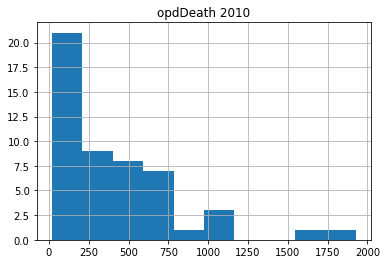

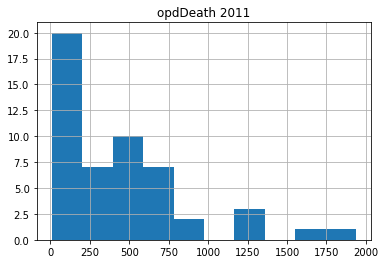

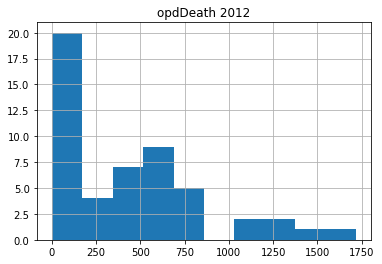

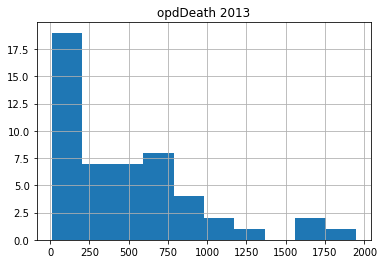

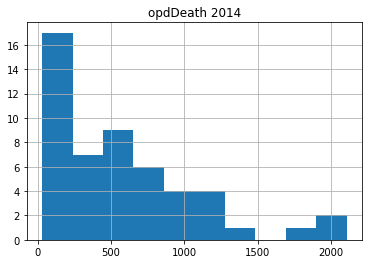

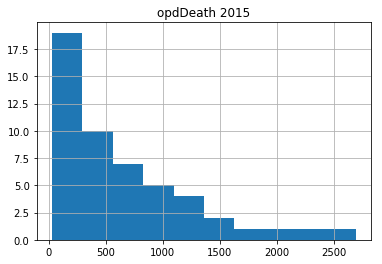

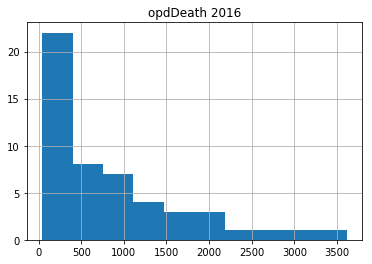

In [55]:
plt.figure(figsize=(15,10))
year=[2010,2011,2012,2013,2014,2015,2016]
 

for i, y in enumerate(year):
    ##plt.subplot(1, 4, i+1)
    Opiod_combined2.loc[(Opiod_combined2.year==y),['opdDeath']].hist()
    plt.title('opdDeath {}'.format(str(y)) )
    
    
 

Text(0.5,1,'Drug Overdose Dealths Year by Year')

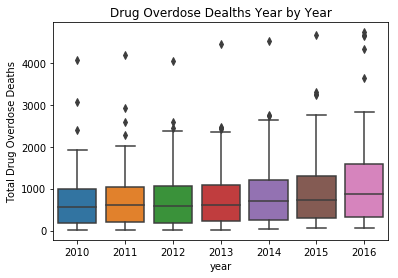

In [56]:
#Opiod_combined2[['opdDeath','year']].boxplot(column='opdDeath', by='year') 
#plt.title('opd Dealth by Year')
sns.boxplot(x='year', y='AllOverdoseDeath', data=Opiod_combined2)
plt.ylabel("Total Drug Overdose Deaths")
plt.title("Drug Overdose Dealths Year by Year")


Text(0.5,1,'Opiod Related Dealth year by year')

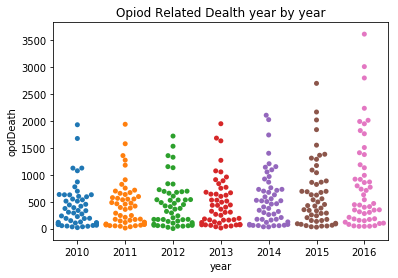

In [57]:
sns.swarmplot(x = 'year', y='opdDeath', data=Opiod_combined2[['opdDeath','year']])
plt.title('Opiod Related Dealth year by year')

Text(0.5,6.8,'Total Opiod Related Deaths')

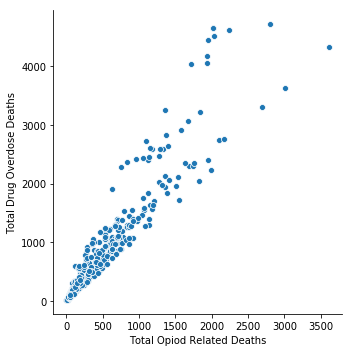

In [58]:
sns.relplot(x='opdDeath', y='AllOverdoseDeath', data=Opiod_combined2)
plt.ylabel('Total Drug Overdose Deaths')
plt.xlabel('Total Opiod Related Deaths')

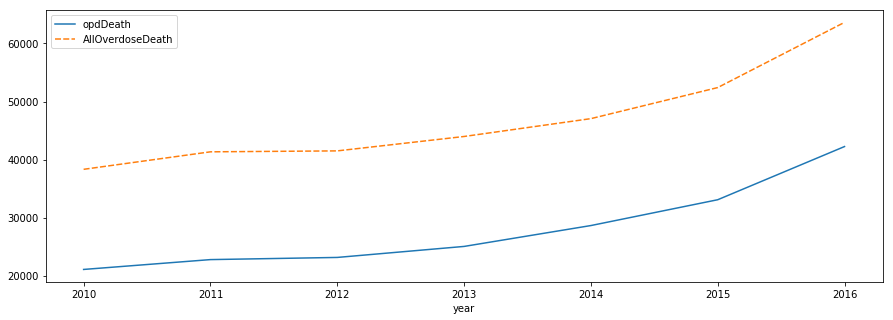

In [59]:
plt.figure(figsize=(15,5))
line=Opiod_combined2[['opdDeath','AllOverdoseDeath','year']].groupby('year').sum()
sns.lineplot(data=line)

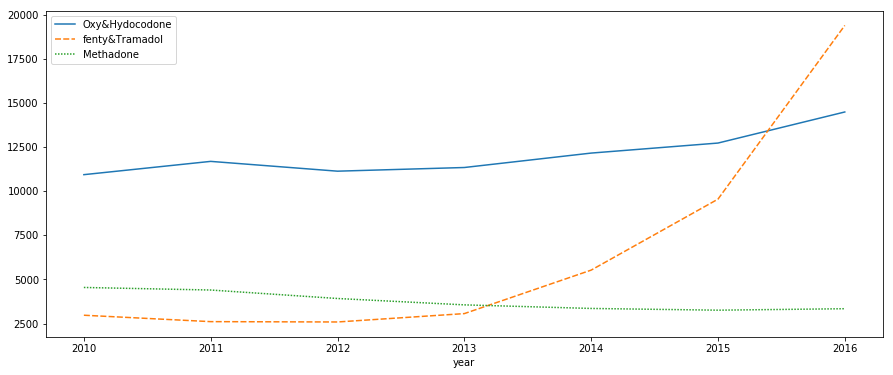

In [60]:
plt.figure(figsize=(15,6))
drugSummary=Opiod_combined2[['Oxy&Hydocodone','fenty&Tramadol','Methadone','year']].groupby('year').sum()
sns.lineplot(data=drugSummary)

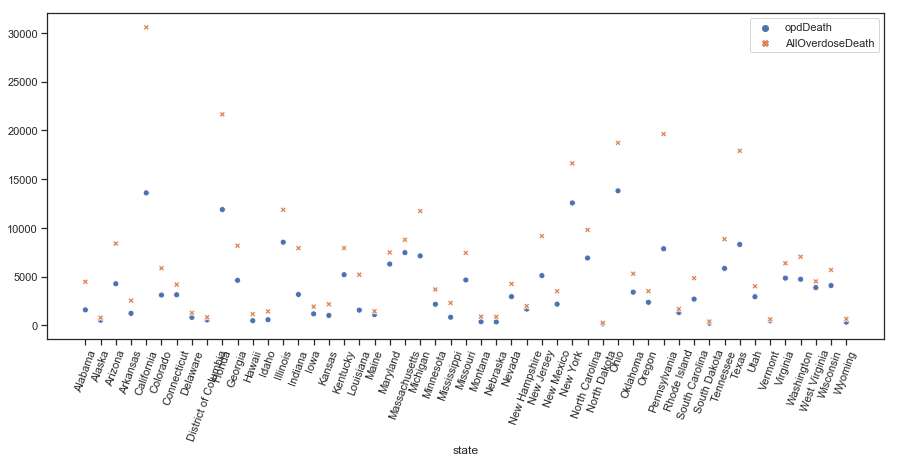

In [110]:
## we can divide it in year to year basis on subplots
plt.figure(figsize=(15,6))
summary_death_bystate=Opiod_combined2[['state','opdDeath','AllOverdoseDeath']].groupby('state').sum() 
sns.scatterplot(data=summary_death_bystate )
plt.xticks(rotation=70)
plt.show()

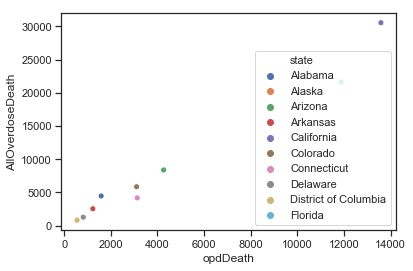

In [150]:
#summary_death_bystate.head(10)
plt.figure(figsize=(15,6))
summary_death_bystate =summary_death_bystate.head(10)

sns.scatterplot(data=summary_death_bystate , x=summary_death_bystate.opdDeath, y=summary_death_bystate.AllOverdoseDeath, 
                hue=summary_death_bystate.index)

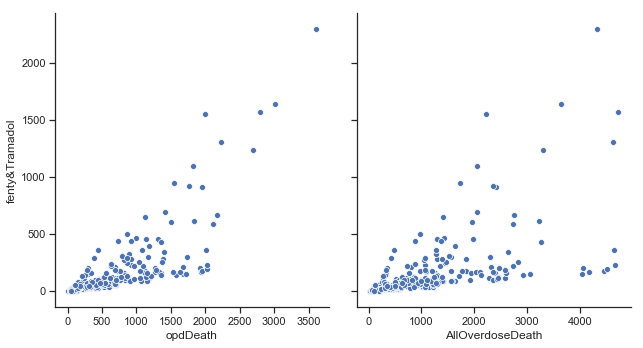

In [178]:
## flat columns
#col=['Oxy&Hydocodone','fenty&Tramadol','Methadone'] 
#yearlyDrugsummary=pd.DataFrame(drugSummary.values,columns= col)
#yearlyDrugsummary['year']=['2010','2011','2012','2013','2014','2015','2016']

sns.pairplot(data=Opiod_combined2, x_vars=['opdDeath','AllOverdoseDeath'], y_vars='fenty&Tramadol' 
            ,height=5, aspect=.9)


 

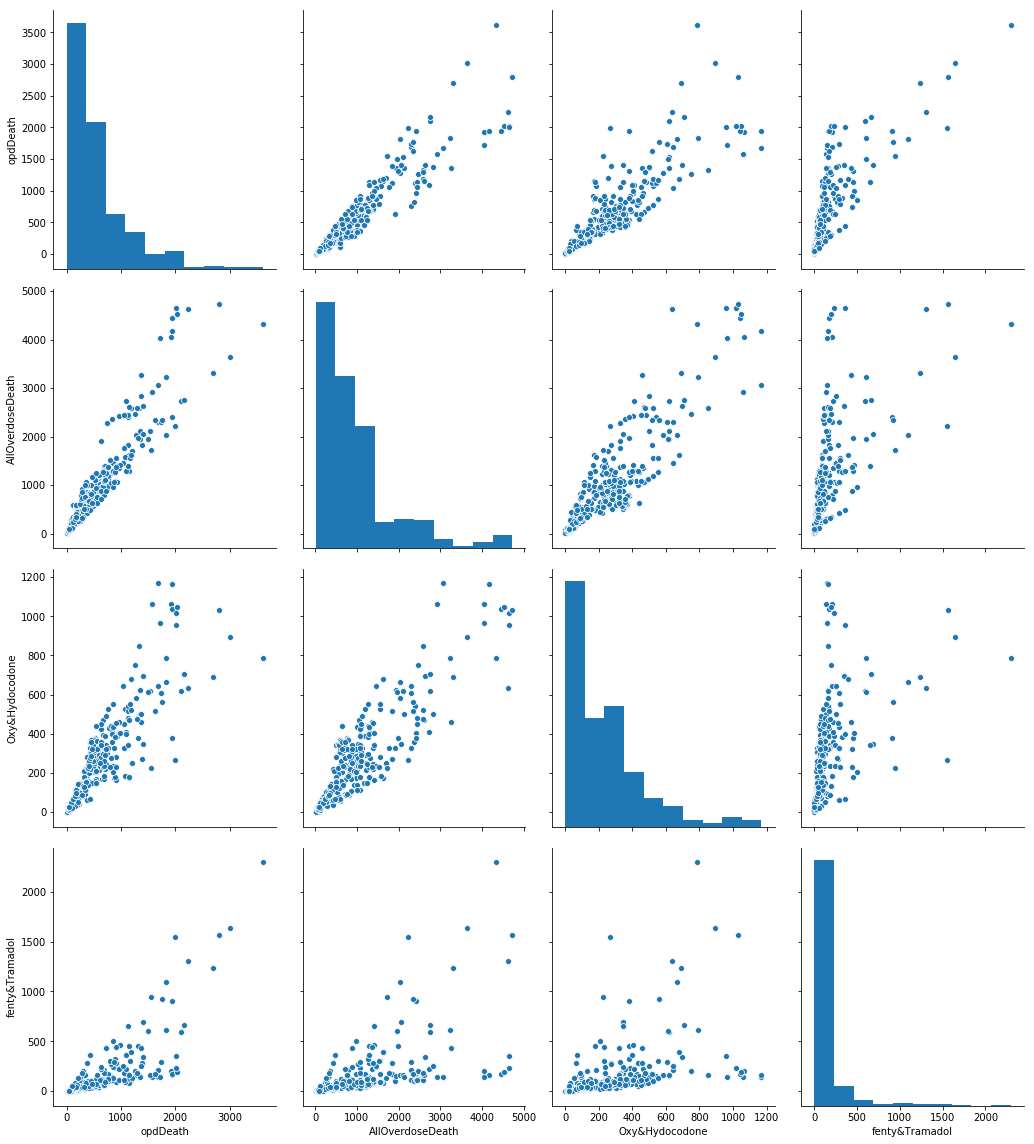

In [30]:
test=Opiod_combined2[['opdDeath','AllOverdoseDeath','Oxy&Hydocodone','fenty&Tramadol']]

sns.pairplot(data=test, height=4, aspect=.9)

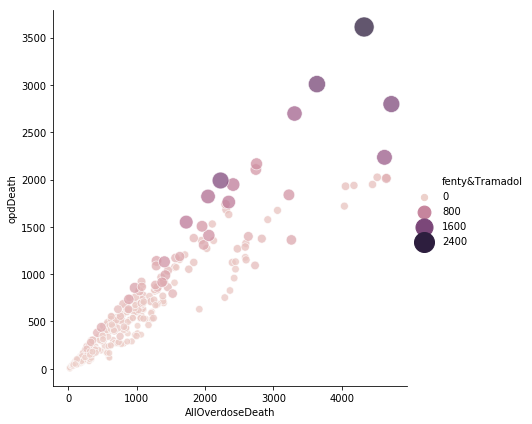

In [46]:
test=Opiod_combined2[['opdDeath','AllOverdoseDeath','fenty&Tramadol','year']]


sns.relplot(data=test, x='AllOverdoseDeath', y='opdDeath', size='fenty&Tramadol', hue='fenty&Tramadol'
           ,sizes=(40,400), alpha=.75,  height=6 
           )

plt.show()


In [56]:
test=Opiod_combined2[['opdDeath','AllOverdoseDeath','Oxy&Hydocodone','fenty&Tramadol','Methadone','Heroin','year']]
test2=test.melt(id_vars='year', value_vars=['Oxy&Hydocodone','fenty&Tramadol','Methadone','Heroin'], var_name='OpoidType' ,value_name='OpoidDeaths'
                )
test2.tail()

,year,OpoidType,OpoidDeaths
1423,2016,Heroin,450
1424,2016,Heroin,283
1425,2016,Heroin,235
1426,2016,Heroin,389
1427,2016,Heroin,0


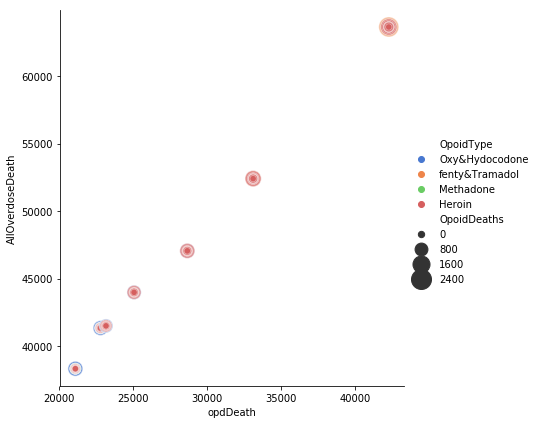

In [78]:
##test3=test.melt(id_vars='year', value_vars=['AllOverdoseDeath'], var_name='DealthType' ,value_name='Deaths')
##test3.tail()
#test.head()
#test3=test.groupby(['year'])[['opdDeath','AllOverdoseDeath']].sum()
#test4=pd.merge(test2,test3, how='inner', on='year' )

#sns.relplot(x="opdDeath", y="AllOverdoseDeath", hue="OpoidType", size="OpoidDeaths",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=test4)
#plt.show()

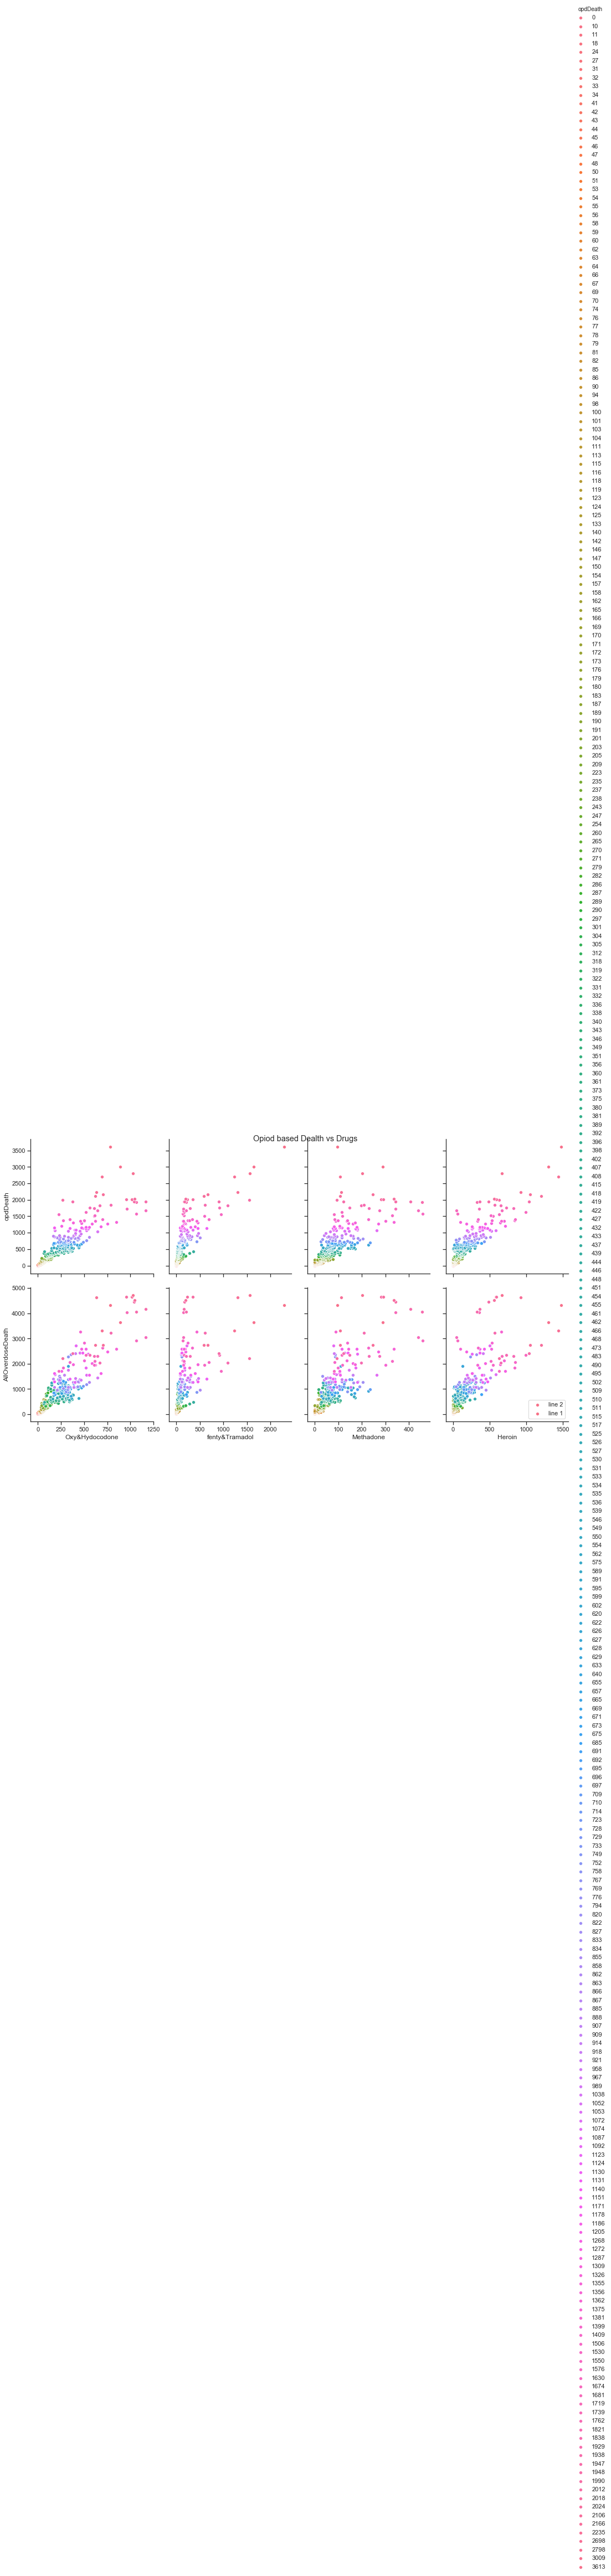

In [306]:
test=Opiod_combined2[['opdDeath','AllOverdoseDeath','Oxy&Hydocodone','fenty&Tramadol','Methadone','Heroin']]
sns.pairplot(data=test, x_vars=['Oxy&Hydocodone','fenty&Tramadol','Methadone','Heroin'], y_vars=['opdDeath','AllOverdoseDeath'],height=4, aspect=.9, hue='opdDeath'
             )
plt.suptitle('Opiod based Dealth vs Drugs')

plt.show()


In [104]:
yearlyDrugsummary

,Oxy&Hydocodone,fenty&Tramadol,Methadone,year
0,10937,2974,4547,2010
1,11689,2611,4402,2011
2,11134,2592,3922,2012
3,11342,3066,3561,2013
4,12159,5529,3358,2014
5,12727,9549,3260,2015
6,14487,19388,3343,2016


In [137]:
summary_death_bystate.head()

,opdDeath,AllOverdoseDeath
state,,
Alabama,1589,4474
Alaska,534,798
Arizona,4270,8392
Arkansas,1234,2546
California,13588,30563


In [276]:
temp=pd.pivot_table(Opiod_combined2, ['opdDeath' ],['state','year']) 
temp.head()

def plt_state_year(state):
    data=temp.loc[state]
    plt.plot(data.index, data.values)
    

##plt.plot(temp.index, temp.values)


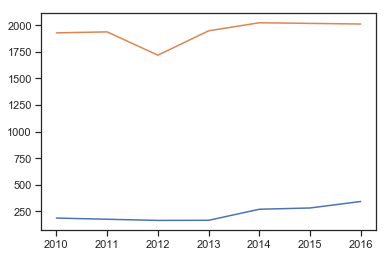

In [295]:
states=["Alabama","California"]
l=[]
for t in states:
    plt_state_year(t)


In [8]:
by_gender=Opiod_combined2[['Male','Female','GenderTotal','year','state']]

In [9]:
by_gender.head()

,Male,Female,GenderTotal,year,state
0,117,70,187,2010,Alabama
1,32,30,49,2010,Alaska
2,372,254,626,2010,Arizona
3,101,88,189,2010,Arkansas
4,1225,704,1929,2010,California


In [25]:
bygenderMelt=by_gender.melt(id_vars=['state','year'], value_vars=['Male','Female'], var_name=["Gender"], value_name='TotalOpoidDeaths')


In [24]:
bygenderMelt.head()


,state,year,Gender,TotalOpoid_Deaths
0,Alabama,2010,Male,117
1,Alaska,2010,Male,32
2,Arizona,2010,Male,372
3,Arkansas,2010,Male,101
4,California,2010,Male,1225


In [57]:
import altair as alt
from vega_datasets import data
# saving data into a file rather than embedding into the chart
opd_death_summary=Opiod_combined2[['state','opdDeath','year']]

alt.data_transformers.enable('json') 

# jupyter notebook needs this option.
alt.renderers.enable('notebook')
states = alt.topo_feature(data.us_10m.url, 'states')



In [123]:
#del Opiod_combined2
#del opd_death_summary_2016
temp1.head()

,opdDeath,AllOverdoseDeath,OpdDeath%,year,Oxy&Hydocodone,fenty&Tramadol,Methadone,Heroin,White,Black,Hispanic,Race_Total,Male,Female,GenderTotal,state,id
0,187,547,0.34,2010,82,34,78,0,177,0,0,177,117,70,187,Alabama,1
1,176,552,0.32,2011,92,19,63,14,167,0,0,167,101,75,176,Alabama,1
2,165,562,0.29,2012,62,16,55,35,148,0,0,148,105,60,165,Alabama,1
3,166,598,0.28,2013,65,30,41,40,150,0,0,150,104,62,166,Alabama,1
4,270,723,0.37,2014,90,47,44,122,244,0,0,244,160,110,270,Alabama,1


In [124]:
#opd_death_summary.dropna(inplace=True)
#=opd_death[['opdDeath']].astype(float)
t=pd.read_csv('https://vega.github.io/vega-datasets/data/population_engineers_hurricanes.csv')
t=t[['id','state']]

temp1=pd.merge(Opiod_combined2, t, how='inner', left_on='state', right_on='state')

#Opiod_combined2.head()
opd_death_summary_2016=temp1[temp1.year==2016]
##opd_death_summary_2016.head()



,opdDeath,AllOverdoseDeath,OpdDeath%,year,Oxy&Hydocodone,fenty&Tramadol,Methadone,Heroin,White,Black,Hispanic,Race_Total,Male,Female,GenderTotal,state,id
6,343,756,0.45,2016,94,157,34,126,282,53,0,335,218,125,343,Alabama,1
13,94,128,0.73,2016,45,0,13,49,70,0,0,70,64,30,94,Alaska,2
20,769,1382,0.56,2016,326,123,75,299,532,21,168,721,497,272,769,Arizona,4
27,169,401,0.42,2016,114,38,32,13,159,0,0,159,91,78,169,Arkansas,5
34,2012,4654,0.43,2016,955,355,281,587,1397,137,372,1906,1368,644,2012,California,6


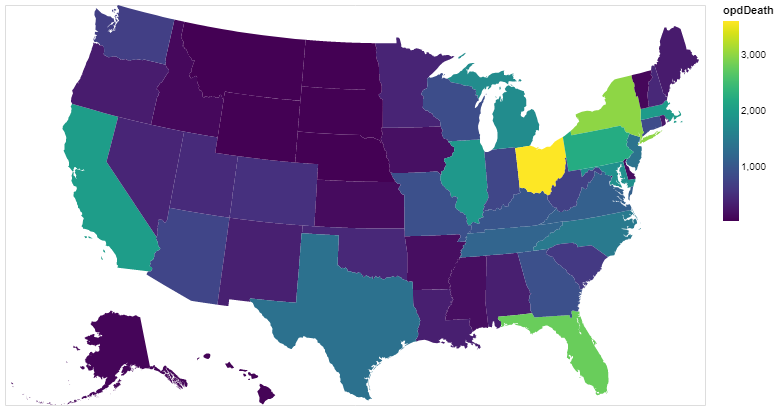

In [128]:
opd_death_summary_2016.dropna()

alt.Chart(states).mark_geoshape().project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(opd_death_summary_2016, 'id',['opdDeath'])
).encode(
    color='opdDeath:Q'
).properties(
    width=700,
    height=400
) 
                                                                                                      


In [135]:
#opd_death_summary_2016[druglist]

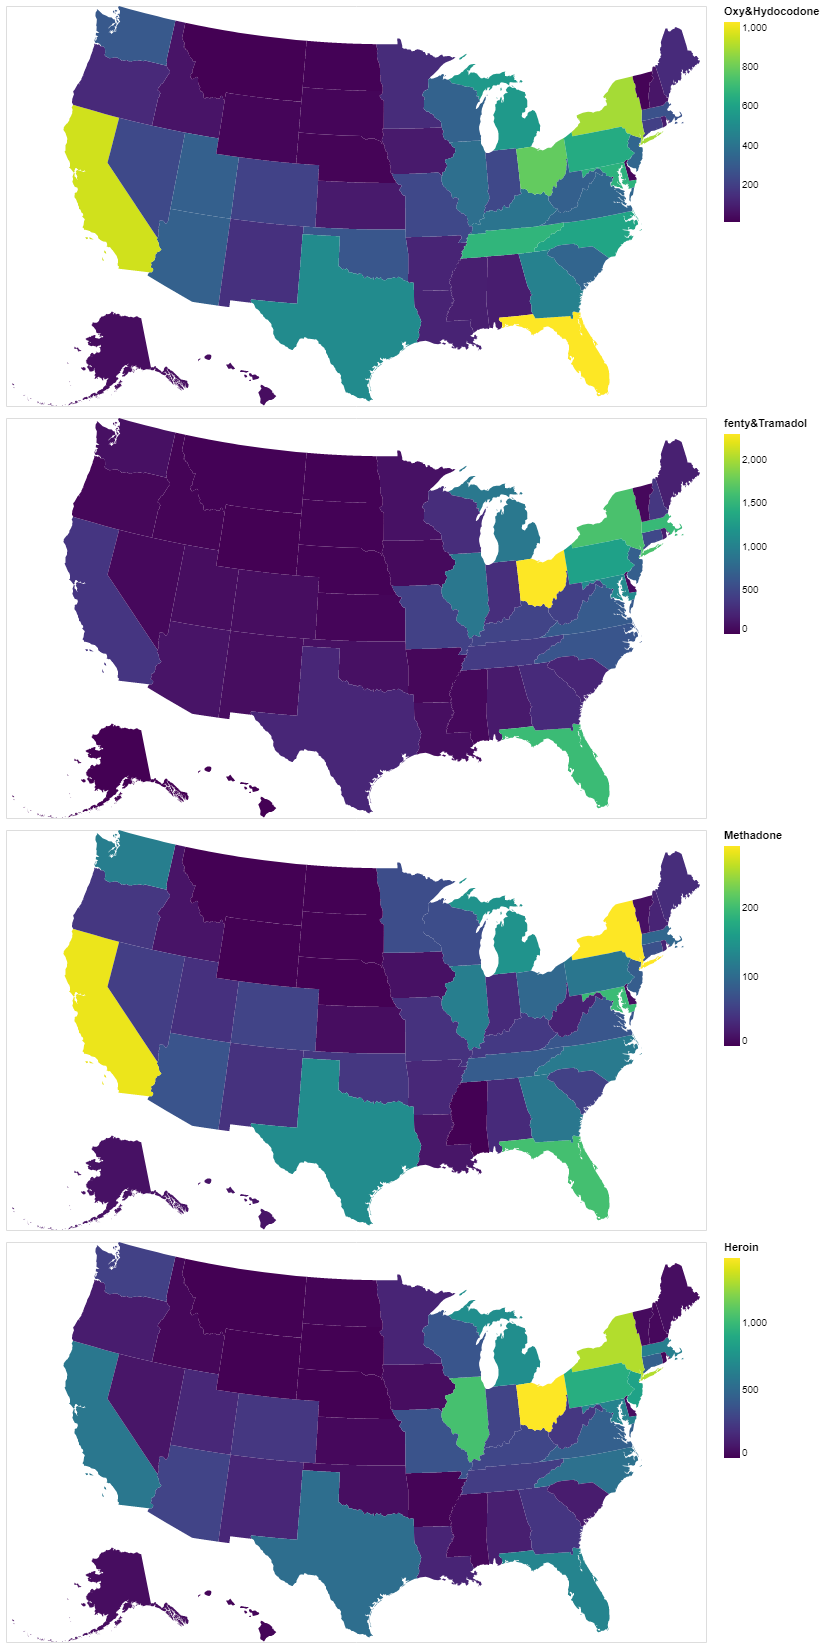

In [139]:
druglist=['Oxy&Hydocodone','fenty&Tramadol','Methadone','Heroin']

alt.Chart(states).mark_geoshape().project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(opd_death_summary_2016, 'id',druglist)
).encode(
    alt.Color(alt.repeat('row'), type='quantitative')
    
).properties(
    width=700,
    height=400
).repeat(
    row=druglist
).resolve_scale(
    color='independent'
)

In [140]:
## analysis
opd_death_summary_2016.head()


,opdDeath,AllOverdoseDeath,OpdDeath%,year,Oxy&Hydocodone,fenty&Tramadol,Methadone,Heroin,White,Black,Hispanic,Race_Total,Male,Female,GenderTotal,state,id
6,343,756,0.45,2016,94,157,34,126,282,53,0,335,218,125,343,Alabama,1
13,94,128,0.73,2016,45,0,13,49,70,0,0,70,64,30,94,Alaska,2
20,769,1382,0.56,2016,326,123,75,299,532,21,168,721,497,272,769,Arizona,4
27,169,401,0.42,2016,114,38,32,13,159,0,0,159,91,78,169,Arkansas,5
34,2012,4654,0.43,2016,955,355,281,587,1397,137,372,1906,1368,644,2012,California,6


In [168]:
## analysis ## we see increase in dealth

#top10_state_dealth_2016=
#opd_death_summary_2016[['opdDeath','AllOverdoseDeath','OpdDeath%','year','state']].sort_values (by=['opdDeath','AllOverdoseDeath'], ascending=False).head(10)
#opd_death_summary_2016.groupby(['year','state'])[['opdDeath']].sum().sort_values(by='opdDeath', ascending=False)/
#opd_death_summary_2016.groupby(['year','state'])[['opdDeath']].sum().sort_values(by='opdDeath', ascending=False)
Opiod_combined2.groupby(['year']).agg({'opdDeath': 'sum', 'AllOverdoseDeath':'sum', 'OpdDeath%': 'mean'})
#opd_death.head(10)

,opdDeath,AllOverdoseDeath,OpdDeath%
year,,,
2010,21089,38329,0.575686
2011,22784,41340,0.565490
2012,23157,41502,0.560196
2013,25052,43982,0.586078
2014,28647,47055,0.621765
2015,33091,52404,0.627843
2016,42249,63632,0.647647


In [174]:
Opiod_combined2.groupby(['year'])['OpdDeath%'].mean().cumsum() 

year
2010    0.575686
2011    1.141176
2012    1.701373
2013    2.287451
2014    2.909216
2015    3.537059
2016    4.184706
Name: OpdDeath%, dtype: float64

In [196]:
x=pd.DataFrame(Opiod_combined2.groupby(['year'])['OpdDeath%'].mean() )
  
#x['Cumulative']=x['OpdDeath%'].cumsum()

Index(['OpdDeath%'], dtype='object')

,OpdDeath%
year,
2010,0.575686
2011,0.565490
2012,0.560196
2013,0.586078
2014,0.621765


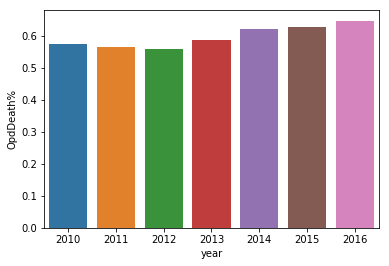

In [210]:
sns.barplot(data=x, x=x.index,y='OpdDeath%')


In [202]:
year_year_pct_change=pd.DataFrame(Opiod_combined2.groupby(['year'])['OpdDeath%'].mean() )
year_year_pct_change['pct_change']=year_year_pct_change['OpdDeath%'].pct_change()
year_year_pct_change

,OpdDeath%,pct_change
year,,
2010,0.575686,NaN
2011,0.565490,-0.017711
2012,0.560196,-0.009362
2013,0.586078,0.046202
2014,0.621765,0.060890
2015,0.627843,0.009776
2016,0.647647,0.031543


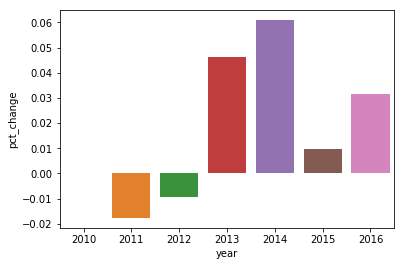

In [205]:
##  in 2013,2014  we saw steep increase in death, now in 2016 again showing growth
sns.barplot(data=year_year_pct_change, x=year_year_pct_change.index, y='pct_change')